## Reading the data file and assigning the column names

In [1]:
import pandas as pd
data = pd.read_csv("data2.txt",names=['Size','Bedrooms','Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Normalizing the features

In [2]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Adding an additional column of ones to account for the variable for the first theta ( parameter )
## h = x0(theta0) + x1(theta1)

In [3]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Creating the X and y matrices for further calculations

In [9]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
print(X.head())
print("\n")
print(y.head())

   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417


      Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389


In [10]:
import numpy as np
X = np.matrix(X.values)
y = np.matrix(y.values)

## Creating the theta matrix as an array of 0s

In [22]:
theta = np.matrix(np.array([0,0,0]))
y = y.T

In [23]:
print(X.shape)
print(y.shape)
print(theta.shape)

(47, 3)
(47, 1)
(1, 3)


## Computing the cost function

In [24]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [25]:
computeCost(X,y,theta)

0.48936170212765967

## Initializing variables for the learning rate and number of iterations

In [60]:
alpha = 0.01  
iters = 1000

## Function for gradient descent and computing final values of theta matrix

In [61]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [62]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g

matrix([[ -1.10868761e-16,   8.78503652e-01,  -4.69166570e-02]])

## Computing the cost for the final theta values

In [63]:
computeCost(X,y,g)

0.13070336960771892

## Plotting the cost as a function of the number of iterations

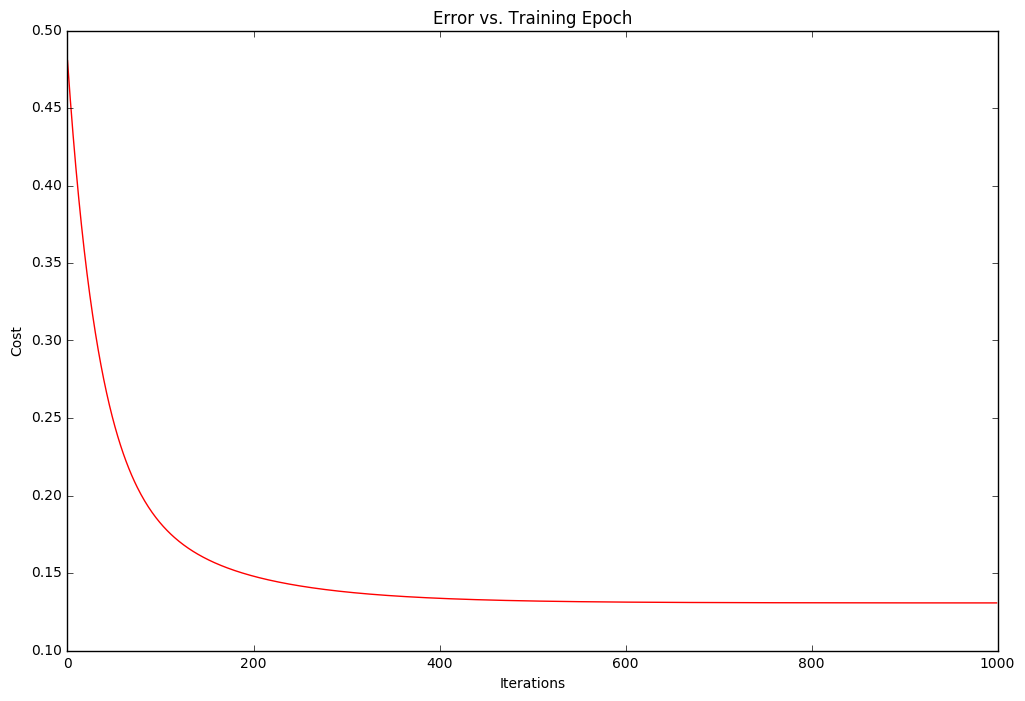

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## Predict price for a 1650 ft, 3 bedroom house

In [67]:
result = [1,2104,3]*g.T

In [68]:
print(result)

[[ 1848.23093431]]
